In [ ]:
import pandas as pd

# Read the data
df = pd.read_csv("/content/Screentime-App-Details.csv")

# Show general info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.2+ KB
None
         Date  Usage  Notifications  Times opened        App
0  08/26/2022     38             70            49  Instagram
1  08/27/2022     39             43            48  Instagram
2  08/28/2022     64            231            55  Instagram
3  08/29/2022     14             35            23  Instagram
4  08/30/2022      3             19             5  Instagram


In [ ]:
import pandas as pd

df = pd.read_csv("/content/Screentime-App-Details.csv")

# Dönüşümler
df["Date"] = pd.to_datetime(df["Date"])
df.rename(columns={"Times opened": "Times_Opened"}, inplace=True)

<ipython-input-3-b647ed21d612>:11: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


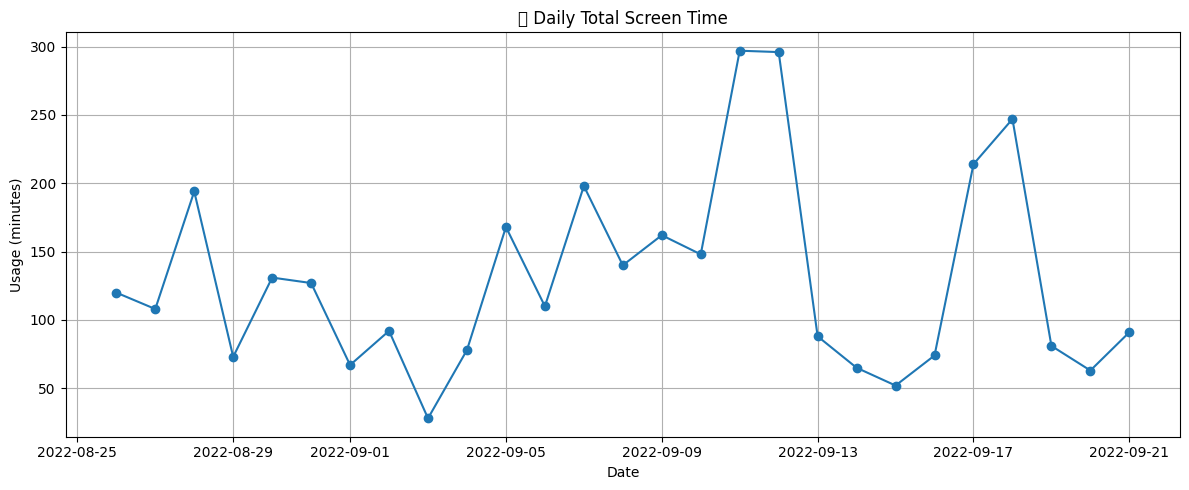

In [ ]:
import matplotlib.pyplot as plt

daily_usage = df.groupby("Date")["Usage"].sum()

plt.figure(figsize=(12, 5))
plt.plot(daily_usage, marker="o")
plt.title("📅 Daily Total Screen Time")
plt.xlabel("Date")
plt.ylabel("Usage (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-4-2552c3ec3e3c>:6: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


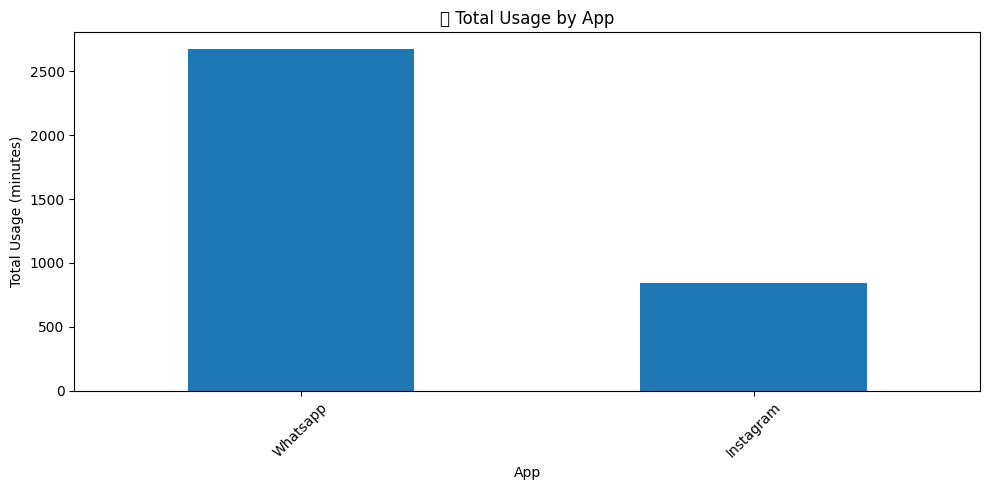

In [ ]:
total_usage_by_app = df.groupby("App")["Usage"].sum().sort_values(ascending=False)

total_usage_by_app.plot(kind="bar", figsize=(10, 5), title="📱 Total Usage by App")
plt.ylabel("Total Usage (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-5-c15bbdc25339>:6: UserWarning: Glyph 128276 (\N{BELL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128276 (\N{BELL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


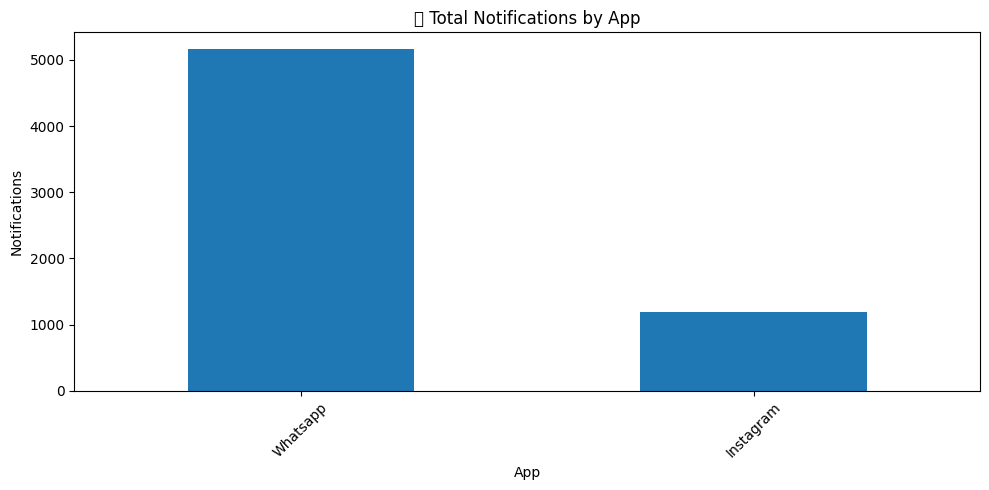

In [ ]:
df.groupby("App")["Notifications"].sum().sort_values(ascending=False).plot(
    kind="bar", figsize=(10,5), title="🔔 Total Notifications by App"
)
plt.ylabel("Notifications")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

# Veriyi oku ve işle
df = pd.read_csv("Screentime-App-Details.csv")
df.rename(columns={"Times opened": "Times_Opened"}, inplace=True)

# Özellikler ve hedef değişken
X = df[["Notifications", "Times_Opened"]]
y = df["Usage"]

# Veri setini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğit
model = LinearRegression()
model.fit(X_train, y_train)

# Modeli kaydet
with open("screentime_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model başarıyla screentime_model.pkl olarak kaydedildi.")


✅ Model başarıyla screentime_model.pkl olarak kaydedildi.


In [ ]:
# Modeli tekrar yükle
with open("screentime_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Örnek tahmin
sample_input = [[100, 50]]  # 100 bildirim, 50 açılış
predicted_usage = loaded_model.predict(sample_input)

print(f"📱 Tahmin edilen kullanım süresi: {predicted_usage[0]:.2f} dakika")


📱 Tahmin edilen kullanım süresi: 51.23 dakika


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import json
import nltk
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

nltk.download('punkt')

with open("intents.json") as file:
    data = json.load(file)

X = []
y = []

for intent in data["intents"]:
    for pattern in intent["patterns"]:
        tokens = nltk.word_tokenize(pattern.lower())
        X.append(" ".join(tokens))
        y.append(intent["tag"])

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

model = LogisticRegression()
model.fit(X_vectorized, y)

pickle.dump(model, open("chatbot_model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
